In [336]:
import pandas as pd
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [337]:
# Load the data from the Excel file
file_path = "C:/Users/rileybla/Desktop/CIE500_SP2025/Project/BNW_sub_with_products.xlsx"
iris = pd.read_excel(file_path)

# Select columns of interest
columns_of_interest = ["precip in", "Turbidity [p:2922]", "Total Dissolved Solids [p:2921]","Dissolved Oxygen (mg/L) [p:2924]","Conductivity [p:2928]",	"Dissolved Oxygen % [p:2925]", "Temperature [p:2926]"] #, "E. coli [p:2927]"
iris = iris.dropna(subset=columns_of_interest)

#Normalize features and target using StandardScaler
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X = scaler_X.fit_transform(iris[["precip in","Conductivity [p:2928]"]])  # Features , "E. coli [p:2927]" ,"Turbidity [p:2922]", "Total Dissolved Solids [p:2921]", "Dissolved Oxygen (mg/L) [p:2924]"
y = scaler_y.fit_transform(iris[["Total Dissolved Solids [p:2921]"]])  # Target

#work in progress
# try including time and loaction as potential Input to model
#X = scaler_X.fit_transform(iris[["Conductivity [p:2928]","precip in"]])  # Features , "E. coli [p:2927]" ,"Turbidity [p:2922]", "Total Dissolved Solids [p:2921]", "Dissolved Oxygen (mg/L) [p:2924]"
#y = scaler_y.fit_transform(iris[["Turbidity [p:2922]"]])  # Target

# This model works well
#X = scaler_X.fit_transform(iris[["precip in","Turbidity [p:2922]","Dissolved Oxygen % [p:2925]","Conductivity [p:2928]"]])  # Features , "E. coli [p:2927]" ,"Turbidity [p:2922]", "Total Dissolved Solids [p:2921]", "Dissolved Oxygen (mg/L) [p:2924]"
#y = scaler_y.fit_transform(iris[["Total Dissolved Solids [p:2921]"]])  # Target
#First few predictions (original scale): [348.66815 160.22792 252.33817 178.94077 168.15547]
#First few actual values (original scale): [425.7     185.20001 258.      191.6     181.1    ]

# fill missing data?
iris


,collection_date,Conductivity [p:2928],Dissolved Oxygen % [p:2925],Dissolved Oxygen (mg/L) [p:2924],E. coli [p:2927],Temperature [p:2926],Total Dissolved Solids [p:2921],Turbidity [p:2922],latitude,longitude,...,ntp,daa,N1P,NTP,DAA,DUA,STA,DSA,OHA,precip in
76,2023-09-16 11:52:00,499.8,110.7,10.92,NaN,16.46,319.8,1.25,42.836339,-78.457240,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_202309161156,NaN,NaN,NaN,NaN,NaN,1.0
77,2023-09-16 11:36:00,484.9,99.4,10.63,NaN,12.71,310.3,2.20,43.141054,-78.926031,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_202309161139,NaN,NaN,NaN,NaN,NaN,0.6
79,2023-09-16 11:07:00,638.1,84.7,8.73,NaN,14.38,408.4,10.50,42.962297,-78.405942,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_202309161104,NaN,NaN,NaN,NaN,NaN,1.0
80,2023-09-16 10:43:00,585.8,112.8,11.78,NaN,13.33,374.9,4.50,42.706475,-78.849177,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_202309161047,NaN,NaN,NaN,NaN,NaN,1.5
81,2023-09-16 10:34:00,554.9,87.6,8.39,NaN,17.81,355.1,14.10,42.995674,-78.191623,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_202309161030,NaN,NaN,NaN,NaN,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4688,2014-04-07 15:46:37,183.6,141.5,19.90,NaN,1.4,217.8,17.90,42.914362,-78.902686,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_201404071542,NaN,NaN,NaN,NaN,NaN,0.0
4689,2014-04-07 15:23:27,171.3,134.3,18.93,NaN,1.3,203.5,26.10,42.928325,-78.899113,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_201404071520,NaN,NaN,NaN,NaN,NaN,0.0
4690,2014-04-07 11:14:31,82.4,105.9,13.95,NaN,3.8,89.7,43.20,43.006753,-78.988467,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_201404071114,NaN,NaN,NaN,NaN,NaN,0.0
4691,2014-04-07 10:51:51,169.6,133.2,17.24,NaN,4.5,181.4,44.50,43.022238,-78.908816,...,NaN,NaN,NaN,KBUF_SDUS51_NTPBUF_201404071053,NaN,NaN,NaN,NaN,NaN,0.0


# Plot a simple visualization of all of the data in iris
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix


# Drop rows without lat/lon or temperature for map
df_map = iris.dropna(subset=['latitude', 'longitude', 'Temperature [p:2926]'])

# 1. Scatter map colored by Temperature
plt.figure(figsize=(8, 6))
plt.scatter(df_map['longitude'], df_map['latitude'], c=df_map['Conductivity [p:2928]'], cmap='viridis', s=60)
plt.colorbar(label='Conductivity [p:2928]')
plt.title('Sample Locations Colored by Temperature')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.tight_layout()
plt.show()

# 2. Time series plot for DO%
df_time = iris.dropna(subset=['collection_date', 'Dissolved Oxygen % [p:2925]']).sort_values('collection_date')
plt.figure(figsize=(10, 5))
plt.plot(df_time['collection_date'], df_time['Dissolved Oxygen % [p:2925]'], marker='o', linestyle='')
plt.title('Dissolved Oxygen % Over Time')
plt.xlabel('Date')
plt.ylabel('DO%')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

# 3. Scatter matrix of water quality variables
quality_vars = ['Conductivity', 'Dissolved Oxygen % [p:2925]', 'DO_mg_L', 'Temperature [p:2926]', 'TDS', 'Turbidity']
df_quality = iris[quality_vars].dropna()
scatter_matrix(df_quality, figsize=(10, 10), diagonal='hist', color='blue', alpha=0.5)
plt.suptitle('Scatter Matrix of Water Quality Variables', y=1.02)
plt.show()


In [ ]:

# This format scaler_y.inverse_transform(output) and include log undo
# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
x_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train.flatten(), dtype=torch.float32)
x_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test.flatten(), dtype=torch.float32)


In [339]:
#increase number of neurons and layers for more accuracy
# Define a complex neural network model
class ComplexNN(torch.nn.Module):
    def __init__(self):
        super(ComplexNN, self).__init__()
        self.hidden1 = torch.nn.Linear(2, 100)  # First hidden layer with 20 neurons 
        self.hidden2 = torch.nn.Linear(100, 60)  # Second hidden layer with 10 neurons
        self.output = torch.nn.Linear(60, 1)   # Output layer

    def forward(self, x):
        x = torch.relu(self.hidden1(x))       # ReLU activation for first hidden layer
        x = torch.relu(self.hidden2(x))       # ReLU activation for second hidden layer
        x = self.output(x)                    # Output layer
        return x

# Initialize model and optimizer
model = ComplexNN()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = torch.nn.MSELoss()  # Mean Squared Error Loss RMSE


In [340]:
import os
import pandas as pd
from torch.utils.data import Dataset

class BuffaloDataset(Dataset):
    def __init__(self, X, y):
        self.Feature = X
        self.Target = y

    def __len__(self):
        return len(self.Target)

    def __getitem__(self, idx):
        image = self.Feature[idx, :]
        label = self.Target[idx]
        return image, label

In [341]:
from torch.utils.data import DataLoader
batch_size=64
training_data=BuffaloDataset(x_train,y_train)
test_data=BuffaloDataset(x_test,y_test)

train_dataloader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=batch_size, shuffle=True)

In [342]:
# New Training loop
# also split into multiple batches. train iteratively use batch size: number of training example in one forward/backward pass
# Training loop
def train_loop(dataloader, model, criterion, optimizer):
    size = len(dataloader.dataset)

    model.train()  # Set model to training mode all the model can be trained
    for batch, (X, y) in enumerate(train_dataloader):
    
        optimizer.zero_grad()  # Reset gradients
    
        # Forward pass: calculate predictions on training set
        y_pred_train = model(X)
    
        # Compute loss on training set
        loss = criterion(y_pred_train.flatten(), y)
    
        # Backward pass: compute gradients
        loss.backward()
    
        # Update weights using optimizer
        optimizer.step()


   


In [ ]:
def test_loop(dataloader, model, criterion):
    # Set the model to evaluation mode - important for batch normalization and dropout layers
    # Unnecessary in this situation but added for best practices
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    total_loss= 0

    # Evaluating the model with torch.no_grad() ensures that no gradients are computed during test mode
    # also serves to reduce unnecessary gradient computations and memory usage for tensors with requires_grad=True
    with torch.no_grad():
        for X, y in dataloader:
            pred = model(X)
            loss = criterion(pred.flatten(), y)
            total_loss += loss.item()

    avg_loss = total_loss / num_batches
    rmse = avg_loss ** 0.5
    print(f"Test RMSE: {rmse:.4f}, Avg MSE Loss: {avg_loss:.4f}")

In [344]:
epochs=1000
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, criterion, optimizer)
    test_loop(test_dataloader, model, criterion)
print("Done!")

Epoch 1
-------------------------------
Test RMSE: 0.2694, Avg MSE Loss: 0.0726
Epoch 2
-------------------------------
Test RMSE: 0.2421, Avg MSE Loss: 0.0586
Epoch 3
-------------------------------
Test RMSE: 0.2124, Avg MSE Loss: 0.0451
Epoch 4
-------------------------------
Test RMSE: 0.2081, Avg MSE Loss: 0.0433
Epoch 5
-------------------------------
Test RMSE: 0.1847, Avg MSE Loss: 0.0341
Epoch 6
-------------------------------
Test RMSE: 0.2005, Avg MSE Loss: 0.0402
Epoch 7
-------------------------------
Test RMSE: 0.1881, Avg MSE Loss: 0.0354
Epoch 8
-------------------------------
Test RMSE: 0.1896, Avg MSE Loss: 0.0360
Epoch 9
-------------------------------
Test RMSE: 0.2132, Avg MSE Loss: 0.0454
Epoch 10
-------------------------------
Test RMSE: 0.1947, Avg MSE Loss: 0.0379
Epoch 11
-------------------------------
Test RMSE: 0.1834, Avg MSE Loss: 0.0336
Epoch 12
-------------------------------
Test RMSE: 0.2090, Avg MSE Loss: 0.0437
Epoch 13
----------------------------

In [345]:

# Evaluate model on test set
model.eval()  # Set model to evaluation mode

with torch.no_grad():
    y_pred_test = model(x_test).flatten()  # Predictions on test set
    
    # Compute loss on test set
    loss_test = criterion(y_pred_test, y_test)
    print(f"Test Loss: {loss_test.item():.4f}")


Test Loss: 0.0399


In [346]:

# Print first few predictions and actual values from test set (scaled values)
print("First few predictions:", y_pred_test[:5].numpy())
print("First few actual values:", y_test[:5].numpy())


First few predictions: [-0.39867082 -0.94326794 -0.50036454 -0.86275303 -0.9097712 ]
First few actual values: [ 0.00179898 -0.9170534  -0.6389143  -0.8926016  -0.93271786]


In [347]:

# Reverse scaling for predictions and actual values to interpret results in original scale
y_pred_original = scaler_y.inverse_transform(y_pred_test.numpy().reshape(-1, 1))
y_actual_original = scaler_y.inverse_transform(y_test.numpy().reshape(-1, 1))

# Reverse log1p transform using exponential
#y_pred_original = np.expm1(y_pred_scaled)  # Undo log1p: e^(x) - 1
#y_actual_original = np.expm1(y_actual_scaled)

print("First few predictions (original scale):", y_pred_original[:5].flatten())
print("First few actual values (original scale):", y_actual_original[:5].flatten())


First few predictions (original scale): [320.88123 178.33862 294.26395 199.41257 187.10605]
First few actual values (original scale): [425.7     185.20001 258.      191.6     181.1    ]


In [348]:
errors = y_actual_original - y_pred_original

rmse = np.sqrt(np.mean(errors ** 2))
mae = np.mean(np.abs(errors))

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")


RMSE: 52.26
MAE: 33.01


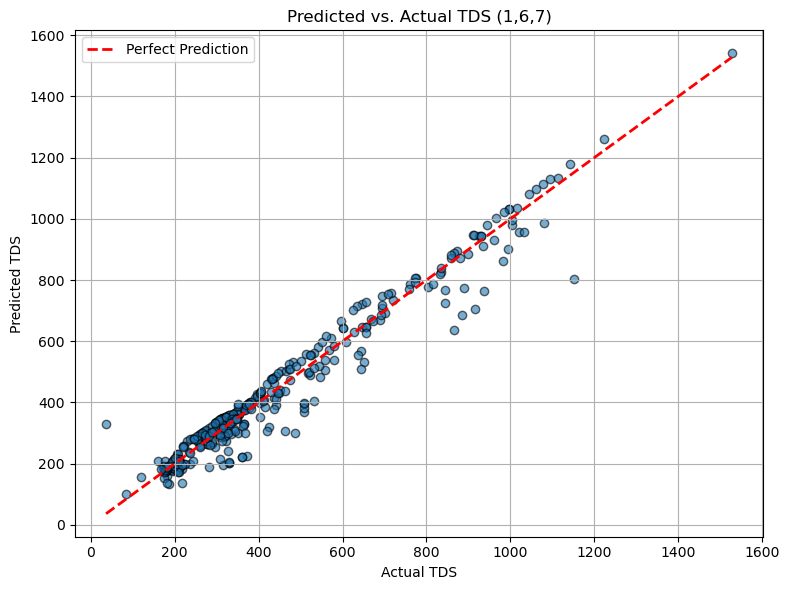

In [349]:
import matplotlib.pyplot as plt

# Assuming these are already inverse-transformed to original scale:
# y_pred_test_ori: NumPy array of model predictions
# y_actual_original: NumPy array of actual test values

plt.figure(figsize=(8, 6))
plt.scatter(y_actual_original, y_pred_original, alpha=0.6, edgecolors='k')
plt.plot([y_actual_original.min(), y_actual_original.max()],
         [y_actual_original.min(), y_actual_original.max()],
         'r--', lw=2, label='Perfect Prediction')

plt.xlabel('Actual TDS')
plt.ylabel('Predicted TDS')
plt.title('Predicted vs. Actual TDS (1,6,7)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
